In [91]:
# import packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.metrics import *
from sklearn.feature_selection import *
from sklearn.linear_model import *
from sklearn.model_selection import *
from sklearn.ensemble import *
import os
from collections import *

from matplotlib.pyplot import style

plt.style.use('ggplot')
pd.set_option('display.max_columns',None)

In [64]:
# creating the data

X=np.array([1,2,3,4,5,6])
y=np.array([2,3,7,7,9,8])

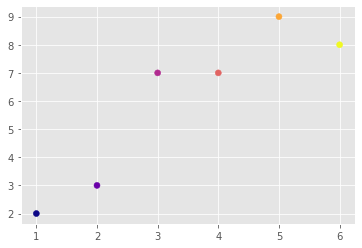

In [73]:
# creating the plot

col=sns.color_palette('bright',5)
plt.scatter(X,y,c=X,cmap='plasma')

In [80]:
# creating function for linear regression

def model(xs,ys):
    
    m=((np.mean(xs)*np.mean(ys))-np.mean(xs*ys))/(((np.mean(xs)**2)-np.mean(xs**2)))
                                                  
    c=np.mean(ys)-(m*np.mean(xs))
    
    return(m,c)

m,c=model(X,y)       

print(f'the slope of the model is {round(m,4)} and the y-intercept is {round(c,4)}')

the slope of the model is 1.3714 and the y-intercept is 1.2


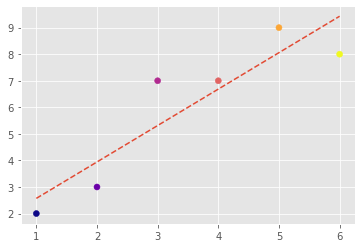

In [79]:
# plotting the model

plt.scatter(X,y,c=X,cmap='plasma')
plt.plot(X,X*m+c,'--')

In [86]:
# finding the error and displaying it

error=np.sum(abs(y-(X*m+c)))
mean_error=np.sum(abs(y-(np.mean(X))))
print(f'Error of the model is: {round(error,4)} and that of the null hypothesis is {round(mean_error,4)}')

r_sq=(mean_error-error)*100/mean_error
print(f'R-squared is {round(r_sq,2)}%')

Error of the model is: 5.8857 and that of the null hypothesis is 19.0


## KNN scratch

In [123]:
# inputing dummy dataset

data={'k':[[1,2],[2,1],[3,3],[4,1],[3,2]],'r':[[5,6],[6,9],[9,9],[7,8],[9,6]]}

[[<matplotlib.collections.PathCollection at 0x21c6036c308>,

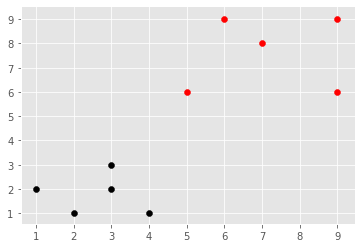

In [93]:
# plotting the data

[[plt.scatter(x[0],x[1],color=i) for x in data[i]]for i in data]

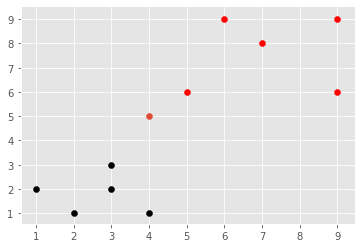

In [98]:
#new data

new_data=[4,5]

[[plt.scatter(x[0],x[1],color=i) for x in data[i]]for i in data]
plt.scatter(new_data[0],new_data[1])

In [135]:
#calculating distances

def knn_try(data,predict,k=5):
    
    distance=[]
    result=[]

    for i in data:
        for x in data[i]:
            distance.append([np.linalg.norm(np.array(x)-np.array(new_data)),i])

    print(f"The distances between new data and original data is: {distance}")

    for i in pd.Series(distance).sort_values():
        result.append(i[1])

    print(f'The resulting class is: {Counter(result[:k]).most_common(1)[0][0]} out of {result[:k]}')
    
knn_try(data,new_data)

The distances between new data and original data is: [[4.242640687119285, 'k'], [4.47213595499958, 'k'], [2.23606797749979, 'k'], [4.0, 'k'], [3.1622776601683795, 'k'], [1.4142135623730951, 'r'], [4.47213595499958, 'r'], [6.4031242374328485, 'r'], [4.242640687119285, 'r'], [5.0990195135927845, 'r']]
The resulting class is: k out of ['r', 'k', 'k', 'k', 'k']


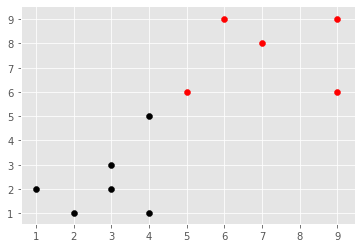

In [137]:
# final plot

[[plt.scatter(x[0],x[1],color=i) for x in data[i]]for i in data]
plt.scatter(new_data[0],new_data[1],color=Counter(result[:5]).most_common(1)[0][0])